---
title: "Beyond the Booty: Understanding Strategic Piracy Around the World"
authors: Hong Zhang, Samuel Bloom
---

## **Introduction** ##
<hr>

When one thinks of pirates, images of treasure filed with gold coins and overflowing loot might come to mind. Stories of high-seas adventure and stolen riches have become the typical representation of pirates. But in the real world, piracy looks quite different. Instead of gold and gemstones, today’s pirates are stealing something far less glamorous.

This sparks the question: What do modern pirates actually steal and why? Are these thefts random, or is there a deeper pattern that explains their behavior? Through data collection and analysis, our project explores the motivations behind pirate thefts and whether their targets are connected to global trade patterns or driven by something else.

This project takes all the pirate attacks over the course of a year and analyzes them based on location and description. Based on these attributes, we can decipher the results of many pirate attacks, which areas are most susceptible, and better understand what potential motivations behind their attacks are.

By using online resources (data found through APIs and PDFs), we can visualize the pirate attacks across the globe, what results typically spur from pirate attacks, and much of the nature of piracy. Using nearby port exports and imports, we can further understand what specifically pirates are stealing, and if they are related to many of the goods these ships are carrying.



```{python}
pip install -r requirements.txt
```


In [42]:
import geodatasets
import geopandas
import matplotlib
import pandas
import regex
import fitz
import wordcloud
import requests

Also, make sure to run the code below to complete functionality of the code:

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Methodology**
<hr>

### **Working with Pirate Attacks Across the Globe** ###

After researching numerous sources related to global piracy, we ultimately relied on two key datasets. The first was a PDF report from the [RECAAP Information Sharing Centre](https://www.recaap.org/) . The second was a global port activity API from PortWatch, which provides detailed trade and vessel data, including estimated cargo volumes and vessel types passing through maritime chokepoints.

To begin, we downloaded the 2024 RECAAP PDF report that contains descriptions of each pirate incident, including the location, date, outcome, and nature of the attack in 2024. However, this data was in a table format, spread across multiple pages with inconsistent formatting. To parse this complex structure, we first developed a Python function called `extract_pirate_locations`. This function focuses solely on parsing Latitude, Longitude, and Area Location.

`extract_pirate_locations` utilizes the following libraries:

    `regex` to match and isolate specific patterns such as location names and DMS-formatted coordinates,

    `pandas` to organize and store the parsed information in a structured format.

In [44]:
from pdf_data_analysis import extract_pirate_locations

extract_pirate_locations('Pirate_Tracker.pdf', 'pirate_locations.csv')

Extracted 107 incidents with lat/lon/area to 'pirate_locations.csv'


,Index,Latitude,Longitude,Area Location
0,1,3° 55.95' N,98° 44.38' E,Indonesia
1,2,1° 3.28' N,103° 40.27' E,Straits of Malacca
2,3,1° 3.75' N,103° 39.81' E,Straits of Malacca
3,4,14° 32.73' N,120° 52.08' E,Philippines
4,5,9° 59' N,107° 4' E,Vietnam
...,...,...,...,...
102,103,1° 3.74' N,103° 41.78' E,Straits of Malacca
103,104,1° 4' N,103° 40' E,Straits of Malacca
104,105,1° 42.31' N,101° 29.62' E,Indonesia
105,106,1° 3.2' N,103° 40.5' E,Straits of Malacca


Given this CSV file, which contains 107 entries, we used `pandas` to load the data into a DataFrame and perform various operations on it. One key step was converting the DMS (degrees, minutes, seconds) format for coordinates into decimal degrees, which are more suitable for computational analysis and geographic plotting. We ensured that each latitude value was correctly paired with its corresponding longitude to represent a single incident’s location. After this processing, the data was ready for visual exploration.

In [45]:
from pdf_to_visuals import sorting_into_df
from pdf_to_visuals import dms_to_decimal_coordinates

index_list, latitude_list, longitude_list, area_list = sorting_into_df("pirate_locations.csv")
decimal_coordinates_final = dms_to_decimal_coordinates(
    latitude_list, longitude_list
)

[(3.9325, 98.73966666666666), (1.0546666666666666, 103.67116666666666), (1.0625, 103.6635), (14.5455, 120.868), (9.983333333333333, 107.06666666666666), (1.0801666666666667, 103.69833333333334), (1.075, 103.58166666666666), (1.4241666666666666, 104.50916666666667), (1.0758333333333334, 103.69366666666667), (1.0583333333333333, 103.66333333333333), (1.061, 103.66416666666667), (1.0666666666666667, 103.67333333333333), (3.788333333333333, 98.7025), (1.1336666666666666, 103.75666666666666), (1.0861666666666667, 103.727), (1.065, 103.68833333333333), (1.0616666666666668, 103.70166666666667), (21.390666666666668, 91.8105), (1.0783333333333334, 103.695), (1.0966666666666667, 103.735), (21.866666666666667, 91.75), (1.0583333333333333, 103.61833333333334), (1.0476666666666667, 103.63933333333334), (1.0455, 103.64666666666666), (1.0455, 103.64666666666666), (1.0703333333333334, 103.68616666666667), (1.0433333333333334, 103.65166666666667), (1.1371666666666667, 103.7565), (1.1333333333333333, 10

Through this conversion, and accessing an online library through a variety of online libraries - `Geopandas`, `Geodatasets`, `Shapely`, some of the previous libraries accessed (`regex`) - we were then able to visualize our specific pirate attack incidents over a world map. Given this same data, we had also specifically zoomed in on areas around Southeast Asia, a hotspot for real-world piracy for further context.


After visualizing the pirate attacks on a global and regional scale, we quickly noticed that the vast majority of incidents were clustered around the Strait of Malacca and the surrounding waters of Indonesia. This observation aligned with real-world concerns about security in these high-traffic trade routes.

To get a clearer and more quantitative understanding of which specific areas were most frequently targeted, we created a function called `area_counter`. This function takes the `pirate_locations.csv` file and analyzes the "Area Location" column to count how many incidents occurred in each unique location. This gave us a frequency breakdown of piracy activity by region, helping us pinpoint the areas with the highest risk of attack.

In [46]:
from pdf_data_analysis import area_counter

area_counter('pirate_locations.csv')

Most common area keywords:

straits of malacca    59
indonesia             22
bangladesh            13
philippines            3
vietnam                2
south china sea        2
india                  2
malaysia               1
dtype: int64


The output from area_counter confirmed what we had observed visually. The Straits of Malacca, along with surrounding regions like Indonesia and Bangladesh, accounted for the majority of piracy incidents. Over half of the recorded attacks occurred near the Straits of Malacca alone. This pattern sparked our curiosity: what is it about these specific areas that makes them such attractive targets for pirates?

Our hypothesis was that it had something to do with the types of cargo being transported through these regions. Maybe pirates were targeting vessels based on the value of the goods in that area. To investigate this, we looked at the PortWatch API, which provides international port-level data on the top traded industries at each port and used the API key to download all of the data to a json file, `Ship_Data.json`.


In [47]:
from port_watch_api_parser import download_portwatch_data

download_portwatch_data()

Of course, the raw API data was far too broad. It included information on hundreds of ports worldwide, many of which had no relevance to our focus on piracy hotspots. Since we were specifically interested in ports located near regions with high piracy activity, we needed a way to narrow down the dataset and extract only the most relevant information.

To do this, we created a function called `extract_country_industries`, which filters the JSON data to include only ports located in countries of interest, those with the highest concentration of pirate attacks (such as Indonesia, Bangladesh, India, the Philippines, Vietnam, and China). For each of these countries, the function compiles a list of the top industries associated with their ports from the data gathered by PortWatch.

By parsing the fields `industry_top1`, `industry_top2`, and `industry_top3` for each relevant port, this function groups the major import/export industries by country and saves the results into `top_countries_industries.json`, a clean, structured JSON file. This allowed us to clearly identify the most commonly traded goods in regions affected by piracy, and helped us determine whether there was a correlation between these goods and pirate attacking patterns.

In [48]:
from port_watch_api_parser import extract_country_industries


extract_country_industries("Ship_Data.json", "top_countries_industries.json")


Extracted country industries:
India: 
Indonesia: Chemical & Allied Industries, Machinery & Electrical Equipment, Metals, Mineral Products, Plastics, Rubber, Leather, Prepared Foodstuffs & Beverages, Vegetable Products, Wood & Wood Products
Vietnam: 
China: Chemical & Allied Industries, Machinery & Electrical Equipment, Metals, Mineral Products, Plastics, Rubber, Leather, Prepared Foodstuffs & Beverages, Vegetable Products, Wood & Wood Products
Philippines: Animal & Animal Products, Chemical & Allied Industries, Machinery & Electrical Equipment, Metals, Mineral Products, Prepared Foodstuffs & Beverages, Stone & Glass, Vegetable Products, Vehicles & Equipment
Bangladesh: 
Malacca: 


However, this part of the process became an unexpected challenge. While the PortWatch API provided a bunch of information, it was incomplete as some countries, including key piracy hotspots like Bangladesh and the Straits of Malacca (Singapore), were missing from the API's JSON results, even though data did appear when searched manually on the PortWatch website. This meant that automated extraction wasn’t possible for a few of the most important regions.

To address this, we supplemented our dataset manually by retrieving trade information directly from the website for the top piracy zones. Since the Straits of Malacca is geographically close to and economically tied with Singapore, we used port data from Singapore as a substitute for the region.

Here are the top traded industries we found by hand:

Singapore (Straits of Malacca):

- Mineral Products

- Chemical & Allied Industries

- Vegetable Products

- Stone & Glass

Bangladesh:

- Mineral Products

- Vegetable Products

- Textiles & Footwear

- Prepared Foodstuffs & Beverages

To figure out whether pirates were targeting ships based on the type of cargo they were carrying, we needed to look beyond just location data. We turned our attention to the descriptions of the piracy incidents themselves. These descriptions contained important context such as what was stolen, whether the crew was harmed, or if nothing was taken at all. This information helped us determine whether the pirates were after specific materials.

To extract this information, we used a custom function called `extract_incident_descriptions`. This function processes the original `Pirate_Tracker.pdf` file and extracts all the incident descriptions using the fitz library. Unlike line-by-line parsing, fitz enables us to extract text in blocks, which better keeps the structure and flow of long incident reports. It saved all of the descriptions into a file called `incident_descriptions.txt`.


In [49]:
from pdf_data_analysis import extract_incident_descriptions

extract_incident_descriptions('Pirate_Tracker.pdf', 'incident_descriptions.txt')

Saved 107 descriptions to 'incident_descriptions.txt'


Next, we wanted to figure out what words or phrases showed up the most in those descriptions. So we made another function called `extract_top_contextual_phrases`. This looked through all the incident reports and counted how often certain phrases appeared.

This helped us understand the patterns in pirate behavior: for example, were they just scaring people, or actually stealing things? It gave us a better idea of why these attacks were happening and what pirates were after.

In [50]:
from pdf_data_analysis import extract_top_contextual_phrases

df = extract_top_contextual_phrases("incident_descriptions.txt")


Top 20 contextual phrases:
"the crew was not injured": 36
"crew members were accounted for": 20
"all crew members were accounted": 19
"sighted in the engine room": 17
"were sighted in the engine": 16
"in the engine room the": 15
"crew was not injured the": 15
"crew mustered to conduct a": 15
"all crew mustered to conduct": 11
"and all crew mustered to": 10
"all crew members were safe": 10
"the engine room the master": 9
"engine room the master raised": 9
"stolen the master reported the": 9
"was raised and all crew": 9
"raised and all crew mustered": 9
"alarm was raised and crew": 9
"alarm and mustered the crew": 8
"engine spare parts were stolen": 8
"was not injured the master": 8


After running this function, we found the top 20 phrases that showed up the most in the descriptions of all the pirate attacks (listed above).

But here’s what really surprised us: none of the most common phrases mentioned anything about stolen cargo, like the top materials we found earlier (for example, mineral products or textiles). Instead, a lot of the reports talked about the engine room and spare parts being stolen.

So, it’s actually pretty safe to say that most pirate attacks aren’t about stealing big cargo like we thought. They’re more focused on grabbing smaller, valuable ship parts. This helped us realize that pirates may be more interested in quick access and ship vulnerability rather than what's officially being imported or exported through the port.

To better visualize these results, we created a word cloud based on the most common phrases from the incident reports. 

We also cleaned up the data by removing random or broken phrases that didn’t make much sense (like chopped-up sentences or repeated filler words). This made the final word cloud a lot more clear and helpful.

**P.S. If you are interested in learning about what the specific functions do, look to the docstrings where each libraries usage is explained**

# **Results (Visualizations)** #
<hr>

Given the completed functions, and libraries all downloaded/imported from `requirements.txt`, we can now visualize all of our data:

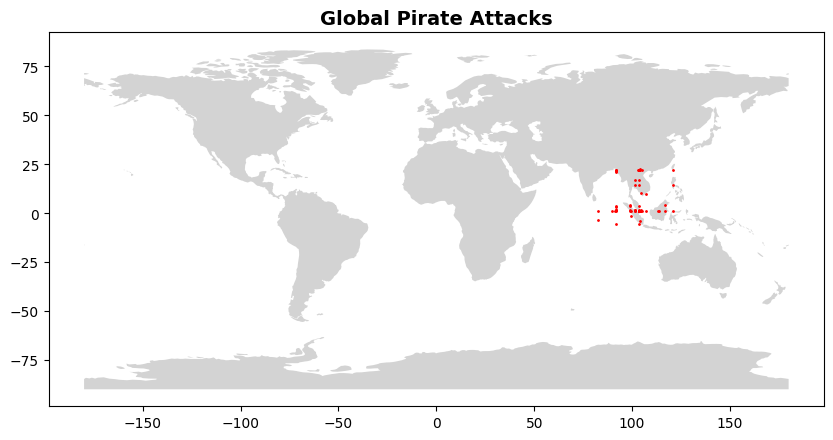

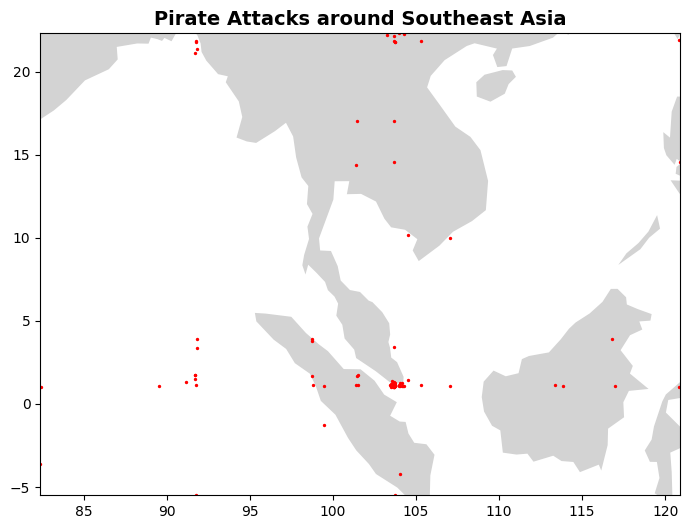

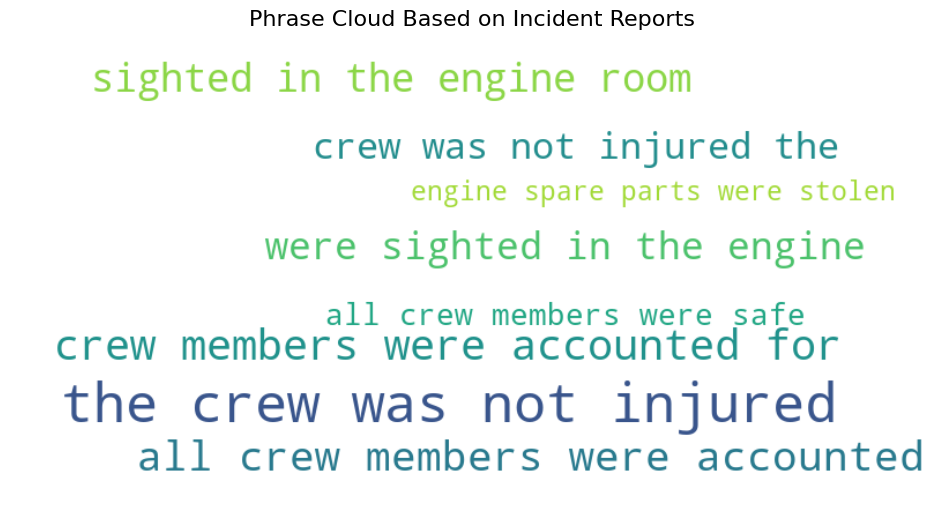

In [51]:
from pdf_to_visuals import plotting_incidents_map

plotting_incidents_map(decimal_coordinates_final)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Working with the 'Phrase Cloud'

# Your phrase count data (from your loop result)
phrase_counts = {
    "the crew was not injured": 36,
    "crew members were accounted for": 20,
    "all crew members were accounted": 19,
    "sighted in the engine room": 17,
    "were sighted in the engine": 16,
    "crew was not injured the": 15,
    "all crew members were safe": 10,
    "engine spare parts were stolen": 8,
}

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(phrase_counts)

# Display it using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Phrase Cloud Based on Incident Reports", fontsize=16)
plt.show()


# **Interpretation** #
<hr>

As demonstrated by the data and visualizations presented above, pirate attacks exhibit a range of characteristics that shape their impact and frequency. The majority of recorded incidents—based on data extracted from the PDF—occurred in Southern Asia. However, it is important to acknowledge that the original dataset appeared to contain incomplete entries, as evidenced by discrepancies with the source website. This likely resulted in a skewed geographic representation of global pirate activity. Nevertheless, the concentration of detailed incidents in Southern Asia provided valuable insight into the dynamics of piracy in this region.

One particularly compelling discovery emerged through our analysis of incident descriptions, further visualized by our generated word cloud: unlike our initial hypothesis that pirates primarily targeted cargo because of their exports and imports, many attacks instead centered around engine rooms and spare engine parts. This unexpected trend reveals a deeper strategic incentive, revealing that pirates are instead engaging in an effort to extract components critical to trading operations.

Further research beyond our dataset supports this narrative. In certain vulnerable regions, pirates have established an informal monopoly on essential ship components, particularly engine parts. Due to the lack of infrastructure or institutional support to replace stolen parts, many sailors are forced to negotiate directly with pirates, perpetuating an uneven power dynamic that favors the aggressors.

Ultimately, our project has revealed that piracy in Southern Asia is not only a matter of theft, but an issue that puts pirates in positions of power, establishing a dynamic between sailors and pirates that forces sailors into compromised positions. 